In [73]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt

In [74]:
# Fetch historical data 
symbol = 'AAPL'
start_date = '2000-01-01' 
end_date = '2022-12-31' 
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [75]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()

In [76]:
data['Signal'] = np.where(data['Close'] > data['SMA_50'], 1, 0)

In [77]:
data['Daily_Return'] = data['Close'].pct_change() 
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1) 
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()



[*********************100%%**********************]  1 of 1 completed


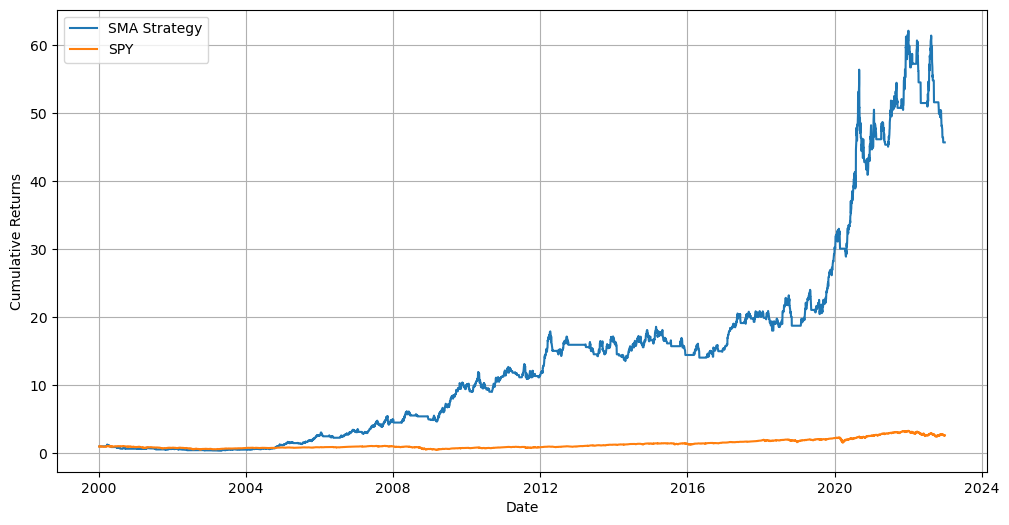

In [78]:
# Fetch historical data for SPY 
spy_data = yf.download('SPY', start=start_date, end=end_date)
# Calculate daily returns and cumulative returns for SPY 
spy_data['Daily_Return'] = spy_data['Close'].pct_change() 
spy_data['Cumulative_Return'] = (1 + spy_data['Daily_Return']).cumprod()
# Plot both cumulative returns on the same chart 
plt.figure(figsize=(12, 6)) 
plt.plot(data.index, data['Cumulative_Return'], label='SMA Strategy') 
plt.plot(spy_data.index, spy_data['Cumulative_Return'], label='SPY') 
plt.xlabel('Date') 
plt.ylabel('Cumulative Returns') 
plt.grid(True)
plt.legend() 
plt.show()


In [91]:
# Calculate drawdowns and average yearly drawdown
cumulative_returns = data['Cumulative_Return'].values
years = data.index.year
drawdowns = []
current_year = years[0]
current_drawdown = 0

for i in range(1, len(cumulative_returns)):
    if years[i] != current_year:
        if current_drawdown > 0:
            drawdowns.append(current_drawdown)
        current_year = years[i]
        current_drawdown = 0
    if cumulative_returns[i] > cumulative_returns[i - 1]:
        current_drawdown = 0
    else:
        drawdown = (cumulative_returns[i - 1] - cumulative_returns[i]) / cumulative_returns[i - 1]
        current_drawdown = max(current_drawdown, drawdown)

if current_drawdown > 0:
    drawdowns.append(current_drawdown)

average_yearly_drawdown = np.mean(drawdowns)*100
print("Average Yearly Drawdown:", average_yearly_drawdown,"%")
# Calculate maximum drawdown
maximum_drawdown = max(drawdowns)*100
print("Maximum Drawdown Percentage:", maximum_drawdown,"%")

Average Yearly Drawdown: 2.1388394152560117 %
Maximum Drawdown Percentage: 7.938243639740242 %


In [82]:
# Calculate highest return (alpha)
highest_return = data['Cumulative_Return'].max()
spy_highest_return = spy_data['Cumulative_Return'].max()
alpha = highest_return - spy_highest_return
print("Alpha (Highest Return):", alpha)

Alpha (Highest Return): 58.88844212777207


In [87]:
# Calculate average daily percentage volatility
strategy_volatility = (data['Strategy_Return'].std()*100)
print("Average Daily percentage Volatility:", strategy_volatility,"%")
# Calculate annual volatility
strategy_volatility_daily = data['Strategy_Return'].std()
strategy_volatility_annual = (strategy_volatility_daily * np.sqrt(252)*100)
print("Average Annual percentage Volatility:", strategy_volatility_annual,"%")

Average Daily percentage Volatility: 1.6711604204146124 %
Average Annual percentage Volatility: 26.52884923986728 %
